# ***Heart Disease Prediction with Logistic Regression***

In [4]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [6]:
# Step 2: Load the CSV File
file_path = "heart_disease.csv"

# Load the Excel file
data = pd.read_csv(file_path)

In [7]:
# Handle missing values (e.g., fill with mean or median)
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# 🔧 Force object type for non-numeric columns before encoding
for col in data.columns:
    if data[col].dtype != 'number' and not pd.api.types.is_numeric_dtype(data[col]):
        data[col] = data[col].astype(str)

# Step 3: Encode Categorical Features
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Diagnostic print to confirm which columns were encoded
#print("Encoded columns:", list(label_encoders.keys()))


In [8]:
# Step 4: Separate Features and Target
X = data.drop('Heart Disease Status', axis=1) # Changed df to data
y = data['Heart Disease Status'] # Changed df to data

In [9]:
# Step 5: Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Step 6: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# Step 7: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Step 8: Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8065
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1613
           1       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
def predict_heart_disease():
    input_data = {}
    for col in X.columns:
        if col in label_encoders:
            # Show possible categories to user
            classes = label_encoders[col].classes_
            print(f"Options for {col}: {list(classes)}")
            value = input(f"Enter {col}: ")
            try:
                value = label_encoders[col].transform([value])[0]
            except ValueError:
                print(f"Invalid input for {col}. Please enter one of the available options: {list(classes)}")
                return None
        else:
            value = input(f"Enter {col}: ")
            try:
                value = float(value)
            except ValueError:
                print(f"Invalid input for {col}. Please enter a numeric value.")
                return None

        input_data[col] = value

    input_df = pd.DataFrame([input_data])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)

    if 'Heart Disease Status' in label_encoders:
        result_label = label_encoders['Heart Disease Status'].inverse_transform(prediction)[0]
    else:
        result_label = prediction[0]

    return result_label


In [16]:
# Manual input prediction
result = predict_heart_disease()
print("Predicted Heart Disease Status:", result)

Enter Age: 54
Options for Gender: ['Female', 'Male', 'nan']
Enter Gender: male
Invalid input for Gender. Please enter one of the available options: ['Female', 'Male', 'nan']
Predicted Heart Disease Status: None


Evaluate model performance: Confusion Matrix, ROC Curve, Accuracy


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

Confusion Matrix:

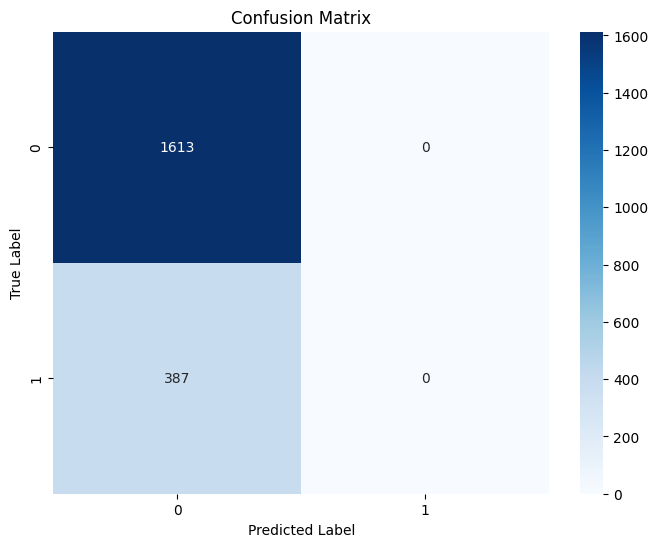

In [18]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

ROC Curve and AUC Score:

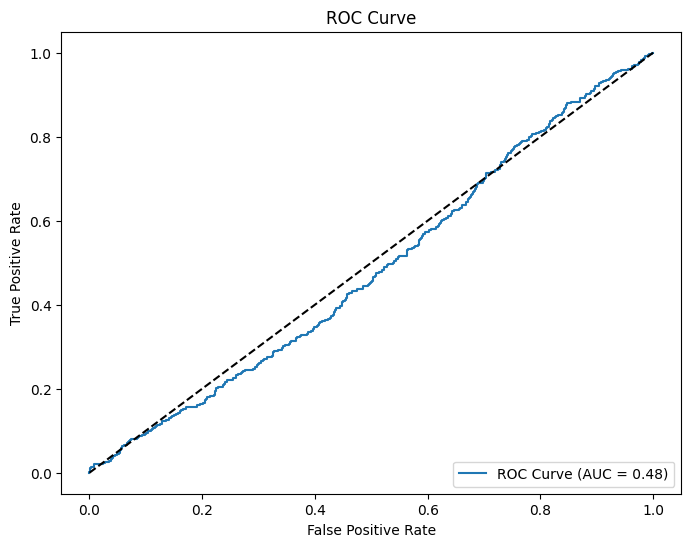

In [19]:
# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Accuracy:

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81
